<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Minimos cuadrados de rango deficiente</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

In [68]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand, randint
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Problema de minimos cuadrados con rango deficiente

### Minimos cuadrados de rango deficiente usando SVD

Hay veces donde al querer resolver un problema, este está muy mal condicionado dado que la matriz que representa al sistema no tiene rango completo (afirmación necesaria para resolver mínimos cuadrados de manera usual por ejemplo).

<b>Proposición 3.1(Demmel):</b> Sea $A\in \mathbb{R}^{m\times n}$ con $m\geq n$ de rango $A=r<n$. Entonces existe un conjunto de dimensión $n-r$ de vectores que minimiza $\|Ax-b\|_2$.

Con esto, una forma de regularizar este problema 'mal puesto' es mediante el uso del siguiente teorema:

<b>Teorema (Demmel):</b> Cuando $A$ de $m\times n$ de rango $r<n$ es. singular, el $x$ que minimiza $\|Ax-b\|_2$ se puede caracterizar como sigue. Para esto, $A=U\Sigma V^T$ es su descomposición SVD y la escribimos como:

$$A = \begin{bmatrix}U_1&U_2\end{bmatrix}\begin{bmatrix}\Sigma_1&0\\0&0\end{bmatrix}\begin{bmatrix}V_1^T\\V^T_2\end{bmatrix}$$

donde $\Sigma_1$ de $r\times r$ almacena los valores singulares no 0. Sea también $\sigma = \sigma_{min}(\Sigma_1)$. Entonces:

- Las soluciones al problema se pueden escribir como siguen, para un $z$ arbitrario:

$$x = V_1\Sigma_1^{-1}U_1^Tb + V_2z$$

- El $x$ de norma mínima se obtiene haciendo $z=0$ y en este caso $\|x\|_2 \leq \|b\|_2/\sigma$

- Cambiando $b$ a $b+\delta b$ cambia la norma de la solución en a lo más $\|\delta b\|_2/\sigma$


Observamos que una de las principales dificultades de resolver el problema de mínimos cuadrados para $A\in \mathbb R^{m\times n}$ y $b\in \mathbb R^{m}$

$$
\text{minimizar}\{\|Ax-b\|_2: x\in \mathbb R^{n}\}
$$
cuando hay rango deficiente es el mal condicionamiento del problema. Por ejemplo, sean $A$ y $b$ dadas por

$$A = \begin{pmatrix}1&0&0\\0&0&0\\0&0&0\end{pmatrix},\quad b=\begin{pmatrix}1\\1\\1\end{pmatrix}$$

entonces la soluci\'on de m\'inima norma de este problema se calcula usando la SVD


In [4]:
A = np.array([[1., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
b = np.array([1., 1., 1.])

U, S, VT = np.linalg.svd(A)

U1, U2 = U[:,:1], U[:,1]
S1 = S[:1]
V1T, V2T = VT[:1,:], VT[1,:]

x = V1T.T@np.linalg.inv(np.diag(S1))@U1.T@b

print(f"La solución de mínimos cuadrados es: x = {x}")
print(f"La norma de la solución es: ||x|| = {np.linalg.norm(x)}")

La solución de mínimos cuadrados es: x = [1. 0. 0.]
La norma de la solución es: ||x|| = 1.0


Consideremos ahora una perturbacion de la matriz $A$ por digamos $\delta A$:

$$A+\delta A = \begin{pmatrix}1&0&0\\0&\varepsilon&0\\0&0&0\end{pmatrix}$$

Entonces, tenemos como valores singulares $1, \varepsilon, 0$, y así:

In [12]:
eps = np.finfo(float).eps
A_tilde = np.array([[1., 0., 0.], [0., eps, 0.], [0., 0., 0.]])

U, S, VT = np.linalg.svd(A_tilde)
U1, U2 = U[:,:2], U[:,2]
S1 = S[:2]
V1T, V2T = VT[:2,:], VT[2,:]

x = V1T.T@np.linalg.inv(np.diag(S1))@U1.T@b

print(f"La solución de mínimos cuadrados es: x = {x}")
print(f"La norma de la solución es: ||x|| = {np.linalg.norm(x)}")

La solución de mínimos cuadrados es: x = [1.00000000e+00 4.50359963e+15 0.00000000e+00]
La norma de la solución es: ||x|| = 4503599627370496.0


¿cómo hacer que ante pequeñas perturbaciones no cambie tanto la solución?

En general, cada vez que computamos los valores singulares $\widehat{\sigma}_i$ de una matriz $A$, estos son tal que:

$$|\widehat{\sigma}_i - \sigma_{i}|\leq \mathcal{O}(\varepsilon)\|A\|_2$$

Como consecuencia de backward stability del cálculo de SVD. Con esto, cada valor singular computado tal que:

$$\widehat{\sigma}_i\leq \mathcal{O}(\varepsilon)\|A\|_2$$

Podemos tratarlo como 0. Así:

In [11]:
U, S, VT = np.linalg.svd(A_tilde)

A_norm = np.linalg.norm(A)

index = 0
for i in range(len(S)):
    if S[i] <= eps*A_norm:
        index = i
        break


U1, U2 = U[:,:index], U[:,index]
S1 = S[:index]
V1T, V2T = VT[:index,:], VT[index,:]

x = V1T.T@np.linalg.inv(np.diag(S1))@U1.T@b

print(f"La solución de mínimos cuadrados es: x = {x}")
print(f"La norma de la solución es: ||x|| = {np.linalg.norm(x)}")

La solución de mínimos cuadrados es: x = [1. 0. 0.]
La norma de la solución es: ||x|| = 1.0


## Problema de minimos cuadrados regularizados, Tikhonov regularization


\begin{equation}
\min_{x\in \mathbb R^{n}} \frac{1}{2} \|Ax-b\|_{2}^{2} + \frac{\tau}{2}\|x\|_{2}^{2}.
\end{equation}
Aca $\lambda>0$ es el parametro de regularizacion, no se conoce a priori y sera determinado basado en los datos del problema.

- Descomposicion SVD : $A = U\Sigma V^{T}$, donde $U\in \mathbb R^{m\times m}$, $ V\in \mathbb R^{m\times n}$ y $\Sigma \in \mathbb{R}^{m\times n}$
\begin{equation}
\sigma_{1} \geq \ldots \geq \sigma_{r} > \sigma_{r+1} = \ldots = \sigma_{\min\{m,n\}} = 0.
\end{equation}

### Solucion del problema de minimos cuadrados regularizado
\begin{equation}
x_{\tau} = \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i}
\end{equation}

- Observe que
\begin{equation}
\lim_{\tau\rightarrow 0 } x_{\tau} = \lim_{\tau \rightarrow 0} \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i} =   \sum_{i=1}^{r}\frac{(u_{i}^{T}b) }{\sigma_{i}} v_{i} = x,
\end{equation}
solucion del problema de minimos cuadrados
- Propiedad de Regularizacion:
\begin{equation}
 \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} \approx \left\{
 \begin{array}{ll}
 0,& \mbox{if } \sigma_{i} \ll \tau \\
  \frac{(u_{i}^{T}b) }{\sigma_{i}},& \mbox{if } \sigma_{i}\gg \tau 
 \end{array} \right.
\end{equation}

### Como escoger $\tau$?
Asuma que $b$ es perturbado por $\Delta b$, $\tilde{b} = b + \Delta b$, y queremos calcular la solucion
\begin{equation}
x = \sum_{i=1}^{r} \frac{u_i^{T} b}{\sigma_{i}} v_i
\end{equation}
pero colo podemos calcular $\tilde{b}$.
\begin{equation}
x_{\tau} = \sum_{i=1}^{r} \left( \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau}  + 
 \frac{\sigma_{i} (u_{i}^{T}\Delta b) }{\sigma_{i}^{2} + \tau} \right) v_{i}
\end{equation}
Tenemos la misma propiedad que antes:
- \begin{equation}
\lim_{\tau\rightarrow 0 } x_{\tau} = \lim_{\tau \rightarrow 0}  \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i} =   \sum_{i=1}^{r}\frac{(u_{i}^{T}b) }{\sigma_{i}} v_{i} = x,
\end{equation}
- \begin{equation}
 \frac{\sigma_{i} (u_{i}^{T}\Delta b) }{\sigma_{i}^{2} + \tau} \approx \left\{
 \begin{array}{ll}
 0,& \mbox{if } \sigma_{i} \ll \tau \\
  \frac{(u_{i}^{T}\Delta b) }{\sigma_{i}},& \mbox{if } \sigma_{i}\gg \tau 
 \end{array} \right.
\end{equation}
$\rightarrow$ escoger $\tau$ suficientemente grande para asegurar que la perturbacion de $\Delta b$ en los datos no sea magnificados por los valores singulares mas pequenos.

In [71]:
t = np.zeros(11)

for j in range(0,11):
    t[j] = 10**(-j)

#t = np.linspace(0,1,11)
#print(t)

Av = np.vander(t, 6, increasing=True)
print("Matriz de vandermonde:\n",Av)
x_exact = np.ones(6)
b_exact =  Av.dot(x_exact)
deltab = np.multiply(0.0001*np.random.rand(b_exact.size), b_exact)#(0.5-np.diag(np.random.rand(b_exact.size)))*b_exact
print(np.random.rand(b_exact.size))
print("delta b:", deltab)
b = b_exact+deltab
print("|b-b_exact|/|b| = ", np.linalg.norm(b-b_exact)/np.linalg.norm(b))
# compute SVD of A
U,S,V = np.linalg.svd(Av, full_matrices=False)

#U,S,V = np.linalg.svd(Av)
#print(S)
y1 = np.dot(U.T,b)
y2 = y1/S
x_svd = np.dot(V.T,y2)
print("|x-x_svd|/|x| = ", np.linalg.norm(x_exact-x_svd)/np.linalg.norm(x_exact))


Matriz de vandermonde:
 [[1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]
 [1.e+00 1.e-02 1.e-04 1.e-06 1.e-08 1.e-10]
 [1.e+00 1.e-03 1.e-06 1.e-09 1.e-12 1.e-15]
 [1.e+00 1.e-04 1.e-08 1.e-12 1.e-16 1.e-20]
 [1.e+00 1.e-05 1.e-10 1.e-15 1.e-20 1.e-25]
 [1.e+00 1.e-06 1.e-12 1.e-18 1.e-24 1.e-30]
 [1.e+00 1.e-07 1.e-14 1.e-21 1.e-28 1.e-35]
 [1.e+00 1.e-08 1.e-16 1.e-24 1.e-32 1.e-40]
 [1.e+00 1.e-09 1.e-18 1.e-27 1.e-36 1.e-45]
 [1.e+00 1.e-10 1.e-20 1.e-30 1.e-40 1.e-50]]
[0.33314515 0.08110139 0.40724117 0.23223414 0.13248763 0.05342718
 0.72559436 0.01142746 0.77058075 0.14694665 0.07952208]
delta b: [8.21401630e-05 9.13463235e-05 1.91765568e-05 5.11830813e-05
 2.24339463e-05 9.78454629e-06 8.62192380e-05 9.72919586e-05
 9.60834668e-05 9.06555500e-05 7.74047333e-05]
|b-b_exact|/|b| =  3.571874758576705e-05
|x-x_svd|/|x| =  412528.5714292332


In [66]:
N= 20
error = np.zeros(N, dtype=np.float64)
tau   = np.zeros(N, dtype=np.float64)
print("\sigma:", S)
for i in range(0,N): # solve regularized LLS for different lambda
    tau[i] = 10**(3-i)
    y1 = np.dot(U.T,b)

    coeff = np.zeros(S.size)
    for j in range(S.size):
        coeff[j] = S[j]/(S[j]**2+tau[i])
    print("sigma approx ",coeff)
    y2 = np.multiply(y1,coeff) 
    #print("y2", y2)
    x_tau = np.dot(V.T,y2)
    #x_tau = V * (sigma.dot((U.T).dot(b)) / (sigma.^2 + lambda(i+1)))
    
    error[i] = np.linalg.norm(x_tau - x_exact)/np.linalg.norm(x_exact);
    #print("x_tau", x_tau)
print(error)

\sigma: [3.43155988e+00 2.05616208e+00 8.24366681e-02 7.24430072e-04
 6.64057352e-07 5.48049537e-11]
sigma approx  [3.39162149e-03 2.04750563e-03 8.24361079e-05 7.24430072e-07
 6.64057352e-10 5.48049537e-14]
sigma approx  [3.07004371e-02 1.97275778e-02 8.24310662e-04 7.24430068e-06
 6.64057352e-09 5.48049537e-13]
sigma approx  [1.57587363e-01 1.44517193e-01 8.23806838e-03 7.24430034e-05
 6.64057352e-08 5.48049537e-12]
sigma approx  [2.68602572e-01 3.93312885e-01 8.18802261e-02 7.24429692e-04
 6.64057352e-07 5.48049537e-11]
sigma approx  [2.88958785e-01 4.75105341e-01 7.71909240e-01 7.24426270e-03
 6.64057352e-06 5.48049537e-10]
sigma approx  [2.91165401e-01 4.85195353e-01 4.90817033e+00 7.24392056e-02
 6.64057352e-05 5.48049537e-09]
sigma approx  [2.91387917e-01 4.86227976e-01 1.05744918e+01 7.24050091e-01
 6.64057352e-04 5.48049537e-08]
sigma approx  [2.91410188e-01 4.86331480e-01 1.19546126e+01 7.20648118e+00
 6.64057349e-03 5.48049537e-07]
sigma approx  [2.91412415e-01 4.86341833e-0

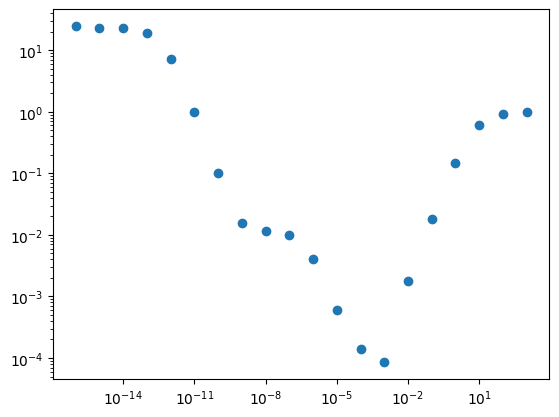

In [67]:
plt.loglog(tau, error,'o')
plt.show()

$\tau \approx 10^{-4}$ seems to be a good choice for the regularization parameter $\tau$.

### Morozov discrepancy principle

We do not know the perturbation $\Delta b$ but we assume its size $\|\Delta b\|$

- Observe, for $A x = b$: 
\begin{equation}
\| A x - \tilde{b} \| = \| A x - b - \Delta b \| = \|\Delta b\| 
\end{equation}
$\rightarrow$ we want to find a regularization parameter $\tau$ such that $x_\tau$ satisfies
\begin{equation}
\|A x_{\tau} - \tilde{b}\| = \|\Delta b\|
\end{equation}

We obtain f the problem of finding $\tau\geq 0$ such that 
\begin{equation}
        \|A x_{\tau} - \tilde{b}\| = \|\Delta b\| \Longleftrightarrow f(\tau) :=  \|A x_{\tau} - \tilde{b}\| - \|\Delta b\|  = 0
\end{equation}

We have a root finding problem. 
